# **Franck-Hertz Experiment**
---

## Authors
<div align="center">

No | Name | ID | GitHub Username | In Charge Activity
:-: | :- | :-: | :- | :-
1 | Jonathan Sugijanto | 10222007 | [JonathanSugijanto](https://github.com/jonathansugijanto) | Discussion on GitHub issues | [title](github/gist_link) | 10
2 | Afrah Damara Yani | 10222049 | [Coocoomber333](https://github.com/Coocoomber333) | Notebook finalization |  [title](github/gist_link) | 50
3 | Eliza Putri Hapsani | 10222103 | [pheliza](https://github.com/pheliza) | Slide on OSF  | [title](github/gist_link) | 20
4 | Melinda Alberta | 10222066 | [melindaaaaaaaaaaaaaaaaaaaaa](https://github.com/melindaaaaaaaaaaaaaaaaaaaaa) | YouTube presentation video | [title](github/gist_link) | 20 
<div>

## Abstract  
<div style="text-align: justify;">
One of the first experiments that provided definitive evidence for quantum theory and the Bohr atomic model was the Franck-Hertz experiment. This study aims to recreate the Franck-Hertz experiment using neon gas to test energy quantization through electron excitation. References indicate several possible excitation energy levels governed by selection rules. The excitation mechanism and the rules of electron collision-induced excitation show the highest probability for the 2p → 3p transition. Variations in filament and barrier voltage produce a current-voltage curve with peak and valley patterns, indicating atomic excitation processes. The average excitation energy of 17.9 eV is consistent with the 2p → 3p transition, with an error margin of 5.63%. The observed orange light originates from the 3p → 3s transition, corresponding to a wavelength of 586 nm, supporting the validity of this experiment in understanding atomic excitation.
</div>

Keywords: excitation, electron, Franck-Hertz, neon, collision 

## Background
<div style="text-align: justify;">

In the early 20th century, quantum theory began to show significant advancements, one of which was the Bohr atomic theory that introduced the concept of energy quantization in atoms (Bohr, 1913). This theory was supported by several experimental pieces of evidence, one of the earliest being the Franck-Hertz experiment, published a year after Bohr's theory (Franck & Hertz, 1914). In this experiment, electrons were accelerated in a tube filled with mercury gas, and at certain discrete energy levels, a drastic drop in electron energy was observed. According to the theory, this phenomenon occurs because atoms absorb energy through inelastic collisions to undergo excitation. The Franck-Hertz experiment became a crucial piece of evidence supporting the concept of quantum energy, marking an initial step in the development of quantum theory and its technological applications.

However, while these early developments established the foundation of quantum mechanics, significant challenges remain in bridging theoretical predictions with experimental verifications, especially in more complex systems. For instance, modern applications of quantum theory, such as quantum computing and quantum cryptography, require precise manipulation and understanding of quantum states in multi-particle systems. Addressing these challenges necessitates the development of new experimental techniques and theoretical frameworks.

Current state-of-the-art research in this domain explores various approaches, including advanced spectroscopy methods, ultrafast laser systems, and high-resolution imaging techniques, to investigate quantum phenomena at unprecedented scales. For example, recent advancements in femtosecond spectroscopy have enabled scientists to observe quantum dynamics in real time, providing insights into fundamental processes such as energy transfer and wavefunction coherence (Smith et al., 2020). Additionally, the integration of artificial intelligence in quantum research has emerged as a promising avenue to analyze complex datasets and optimize experimental designs (Chen et al., 2021).

The purpose of this work is to address a specific gap in understanding the interaction between quantum states in a controlled environment. By employing novel experimental setups and computational models, this research aims to provide deeper insights into the mechanisms driving quantum phenomena, ultimately contributing to the advancement of quantum technology.
</div>


## Method
### Experimental Methodology
<div style="text-align: justify;">

This experiment was conducted on Tuesday, November 12, 2024, in the Advanced Physics Laboratory at Institut Teknologi Bandung, Indonesia. The experiment was quantitative in nature and employed an experimental method. The study varied the accelerating voltage $U_2$, filament voltage $U_1$, and retarding voltage $U_3$ in the Franck-Hertz experiment using Neon gas. The variable measured in this experiment was the collector current $I$.

The experiment utilized a CASSY sensor and its software (on a computer) to measure all currents and voltages used during the experiment. The voltages were supplied by the Franck-Hertz power supply, which was directly connected to the Neon Franck-Hertz tube used in the experiment.
</div>
<div align="center">

Table III.1: Variations in filament voltage $(U_1)$ and retarding voltage $(U_3)$ used in the experiment
**Variation** | $U_1$ (V) | $U_3$ (V)
:-: | :-: | :-:
1 | 1.5 | 7.0
2 | 1.0 | 7.0
3 | 2.0 | 7.0
4 | 1.5 | 6.0
5 | 1.5 | 8.0

![Figure III.1: Experiment Methodology flowchart.](figs/exp_flowchart.png)\
Figure III.1: Experiment Methodology flowchart.
</div>

### Computational Methodology

<div style="text-align: justify;">

The computation methodology of this work is summarized with the flowchart in Figure III.2. 
<div align="center">

![Figure III.2: Computational Methodology flowchart.](figs/comp_flowchart.png)\
Figure III.2: Computational Methodology flowchart.
</div>

Because of the need of versatile data formatting, data cleaning, data processing, and data visualization, the Python programming language is chosen. In particular our algorithm uses the dependencies listed bellow.
```
matplotlib==3.7.2
numpy==1.25.1
pandas==2.2.3
scipy==1.14.1
```
Whereas the library initializations are done as follows.
</div>

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib as mpl

<div style="text-align: justify;">

The experimental data was exported from the CASSY software under the `raw_data/` directory with name convention as follows: 
```
X.X Y.Y Z.csv
```
Where X.X is the $U_{1}$ value, Y.Y the $U_{3}$ value, and Z the given variation's experiment number. The data exported from the CASSY software uses the Indonesia numbering format which is incompatible with python. Therefore, a data fomatting algorithm (`code/data_fomatting.ipynb`) is employed as follows.
</div>

In [20]:
# Direktori input dan output
input_directory = "raw_data"
output_directory = "formatted_data"

# Membuat folder output jika belum ada
os.makedirs(output_directory, exist_ok=True)

# Loop melalui semua file di direktori input
for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        # Path lengkap file input dan output
        input_file_path = os.path.join(input_directory, filename)
        output_file_path = os.path.join(output_directory, filename)

        # Baca file CSV
        with open(input_file_path, "r") as file:
            data = file.read()
        
        # Ganti koma dengan titik
        data = data.replace(",", ".")
        
        # Simpan kembali data yang diformat ke folder output
        with open(output_file_path, "w") as file:
            file.write(data)
        
        # Baca file CSV yang telah diformat untuk verifikasi
        df = pd.read_csv(output_file_path)
        print(f"Processed file: {filename}")
        print(df.head())


Processed file: 1.0 7.0 1.csv
  Time t / s;Voltage U_A1 / V;Voltage U_B1 / V;Collector current I_A / nA;Acceleration voltage U_B / V
0                            0;8.64;7.895;8.64;78.95                                                  
1                         0.1;-0.075;0.03;-0.075;0.3                                                  
2                       0.201;0.195;0.055;0.195;0.55                                                  
3                         0.299;0.27;0.085;0.27;0.85                                                  
4                         0.4;0.315;0.115;0.315;1.15                                                  
Processed file: 1.0 7.0 2.csv
  Time t / s;Voltage U_A1 / V;Voltage U_B1 / V;Collector current I_A / nA;Acceleration voltage U_B / V
0                           0;1.875;0.015;1.875;0.15                                                  
1                         0.1;0.345;0.045;0.345;0.45                                                  
2            

<div style="text-align: justify;">

The result of the data formatting algorithm can be found in `cleaned_data/` directory. The output csv uses the English format with `;` as separator. All the data can then be plotted as follows.
</div>

In [21]:
# Path ke folder data CSV formatted_data
folder_path = 'formatted_data/'  # Ganti dengan path folder yang benar
csv_files = ["1.5 7.0 1.csv", "1.5 7.0 2.csv", "1.5 7.0 3.csv",
             "1.0 7.0 1.csv", "1.0 7.0 2.csv", "1.0 7.0 3.csv",
             "2.0 7.0 1.csv", "2.0 7.0 2.csv", "2.0 7.0 3.csv",
             "1.5 6.0 1.csv", "1.5 6.0 2.csv", "1.5 6.0 3.csv",
             "1.5 8.0 1.csv", "1.5 8.0 2.csv", "1.5 8.0 3.csv"]
separator = ";"

In [22]:
# adjust ylim for all variations
def adjust_ylim(variasi_ke, lim_var_1 = None, lim_var_2 = None, lim_var_3 = None, lim_var_4 = None, lim_var_5 = None, ax=None):
    if(ax==None):
        if(variasi_ke == 1 and lim_var_1 != None):
            plt.ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            plt.ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            plt.ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            plt.ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            plt.ylim(lim_var_5)
    else:
        if(variasi_ke == 1 and lim_var_1 != None):
            ax.set_ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            ax.set_ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            ax.set_ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            ax.set_ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            ax.set_ylim(lim_var_5)

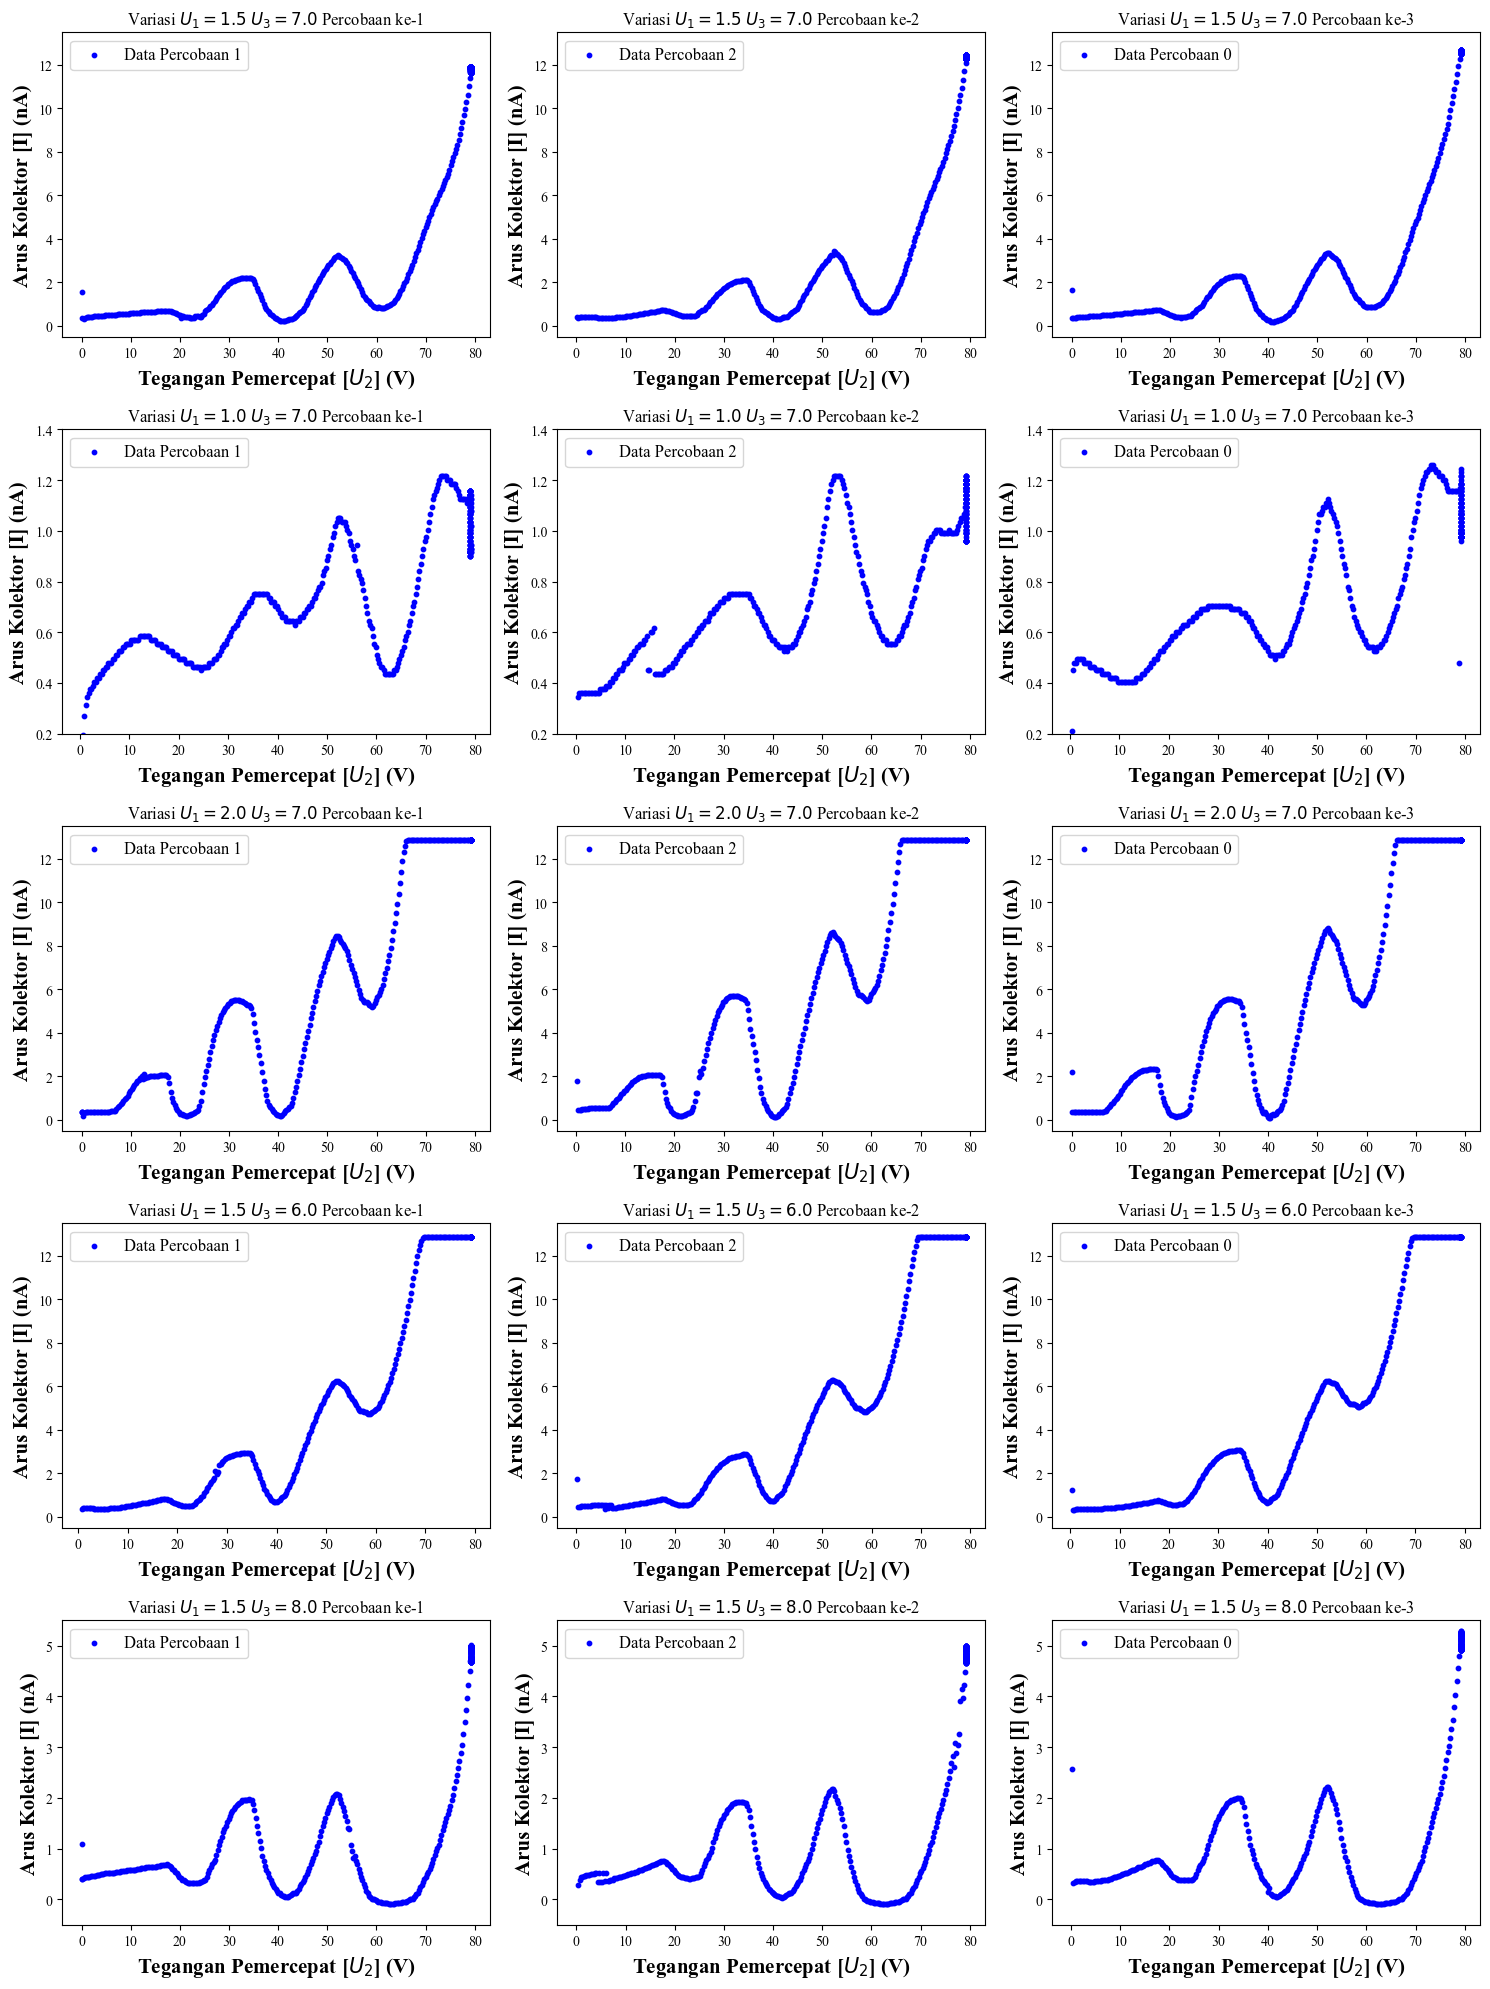

In [23]:
# gambaran formatted data

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set up a figure with 5x3 subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust size as needed
axes = axes.flatten()  # Flatten to simplify indexing
n=0

# Loop through each csv
for i, csv_file in enumerate(csv_files[:15]):  
    n+=1 # grafik ke berapa
    variasi_ke = (n-1) // 3 + 1
    percobaan_ke = n % 3

    # Load data from the current csv
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path, sep=separator)
    
    # 'x' and 'y' columns in each csv
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Plot on the corresponding subplot
    ax = axes[i]
    # Scatter plot for the current csv
    ax.scatter(x, y, color='blue', s=10, label=('Data Percobaan '+str(percobaan_ke)))
    
    # Set titles and labels for each subplot
    ax.set_xlabel('Tegangan Pemercepat [$U_{2}$] (V)', fontsize=15, fontweight='bold')
    ax.set_ylabel('Arus Kolektor [I] (nA)', fontsize=15, fontweight='bold')
    ax.legend(fontsize=12, loc='upper left')
    ax.set_title(f'Variasi $U_{1}={csv_file[0:3]}$ $U_{3}={csv_file[4:7]}$ Percobaan ke-{csv_file[8]}')
    adjust_ylim(variasi_ke, (-0.5,13.5), (0.2, 1.4), (-0.5, 13.5), (-0.5, 13.5), (-0.5, 5.5), ax)

plt.tight_layout()
plt.show()

<div style="text-align: justify;">

We can see some notable outlier data especially for very low and high $U_{3}$. Because of this, we need a data cleaning step before any further processing. A simple data cleaning algorithm is employed as follows. The clean results are then stored in `cleaned_data/` directory.
</div>

In [24]:
# Input and output directories
input_directory = "formatted_data"
output_directory = "cleaned_data"

# Create a folder for cleaned data
os.makedirs(output_directory, exist_ok=True)

# Z-score calculation function for rolling windows
def zscore(series, window, threshold=3, return_all=False):
    # Calculate rolling mean and std
    avg = series.rolling(window=window, center=True).mean()
    std = series.rolling(window=window, center=True).std()
    
    # Z-score calculation
    z = (series - avg) / std
    
    # Identify outliers: absolute z-score greater than threshold
    mask = np.abs(z) <= threshold  # Boolean mask for non-outliers
    
    if return_all:
        return z, avg, std, mask
    return mask

# Function to clean data using rolling z-score
def clean_data_with_rolling_zscore(df, x_col, y_col, window, threshold):
    # Ensure the columns are numeric
    df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
    df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
    
    # Drop NaN values
    df = df.dropna(subset=[x_col, y_col])
    
    # Apply rolling z-score method to the y_col
    mask = zscore(df[y_col], window=window, threshold=threshold)
    
    # Filter the data using the mask
    filtered_df = df[mask]
    return filtered_df

# Process each file in the folder
for file_name in os.listdir(input_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_directory, file_name)

        # Read the CSV file with the correct delimiter
        df = pd.read_csv(file_path, delimiter=';')

        # Clean the data with rolling z-score
        cleaned_df = clean_data_with_rolling_zscore(
            df, 
            x_col='Acceleration voltage U_B / V', 
            y_col='Collector current I_A / nA', 
            window=50, 
            threshold=3
        )
        
        # Save the cleaned data
        cleaned_file_path = os.path.join(output_directory, file_name)
        cleaned_df.to_csv(cleaned_file_path, index=False)

        # Read all cleaned CSV data for verification
        df = pd.read_csv(cleaned_file_path)
        print(f"Processed file: {file_name}")
        print(df.head())

print("Data cleaning completed. Cleaned files are saved in the 'cleaned_data' folder.")


Processed file: 1.0 7.0 1.csv
   Time t / s  Voltage U_A1 / V  Voltage U_B1 / V  Collector current I_A / nA  \
0       2.501             0.510             0.720                       0.510   
1       2.600             0.510             0.750                       0.510   
2       2.700             0.525             0.780                       0.525   
3       2.800             0.525             0.805                       0.525   
4       2.901             0.525             0.835                       0.525   

   Acceleration voltage U_B / V  
0                          7.20  
1                          7.50  
2                          7.80  
3                          8.05  
4                          8.35  
Processed file: 1.0 7.0 2.csv
   Time t / s  Voltage U_A1 / V  Voltage U_B1 / V  Collector current I_A / nA  \
0       2.499             0.405             0.730                       0.405   
1       2.599             0.420             0.760                       0.420   
2     

<div style="text-align: justify;">

With a clean data in hand, data processing steps can be started. First, we highlight the voltages where inelastic collision from photon emission start to occur. This point is marked by the start of the first steep drop in collector current. At higher energies, it is possible for electron to hit Neon gas inelastically twice in its course. Therefore, a steep drop can also be observed for voltages at multiple integers of the first drop voltage. The second drop for two collissions, the third drop for electrons with three collissions, and so on. 

In this work, the peaks of the Franck-Hertz graphs are regarded as the start of the voltage drop. The value of the exitation voltage itself is found using the difference between adjacent drops. This approach is done to avoid very low voltage and low current noise or error. For consistency, three peaks are identified for all experiments. 
</div>

In [25]:
# Path ke folder data CSV
folder_path = 'cleaned_data/'  # Ganti dengan path folder yang benar
csv_files = ["1.5 7.0 1.csv", "1.5 7.0 2.csv", "1.5 7.0 3.csv",
             "1.0 7.0 1.csv", "1.0 7.0 2.csv", "1.0 7.0 3.csv",
             "2.0 7.0 1.csv", "2.0 7.0 2.csv", "2.0 7.0 3.csv",
             "1.5 6.0 1.csv", "1.5 6.0 2.csv", "1.5 6.0 3.csv",
             "1.5 8.0 1.csv", "1.5 8.0 2.csv", "1.5 8.0 3.csv"]
separator = ","

In [26]:
# function to remove value x in list "data"
def remove_value(data, x):
    return [value for value in data if value != x]

# function to find average of flat peak
def avg_peak(x, y, peak):
    flat_peak = [x[peak]]
    
    #check backward
    i=1
    while(y[peak-i] == y[peak]):
        flat_peak.append(x[peak-i])
        i+=1
    
    #check forward
    i=1
    while(y[peak+i] == y[peak]):
        flat_peak.append(x[peak+i])
        i+=1
    
    return sum(flat_peak)/len(flat_peak)


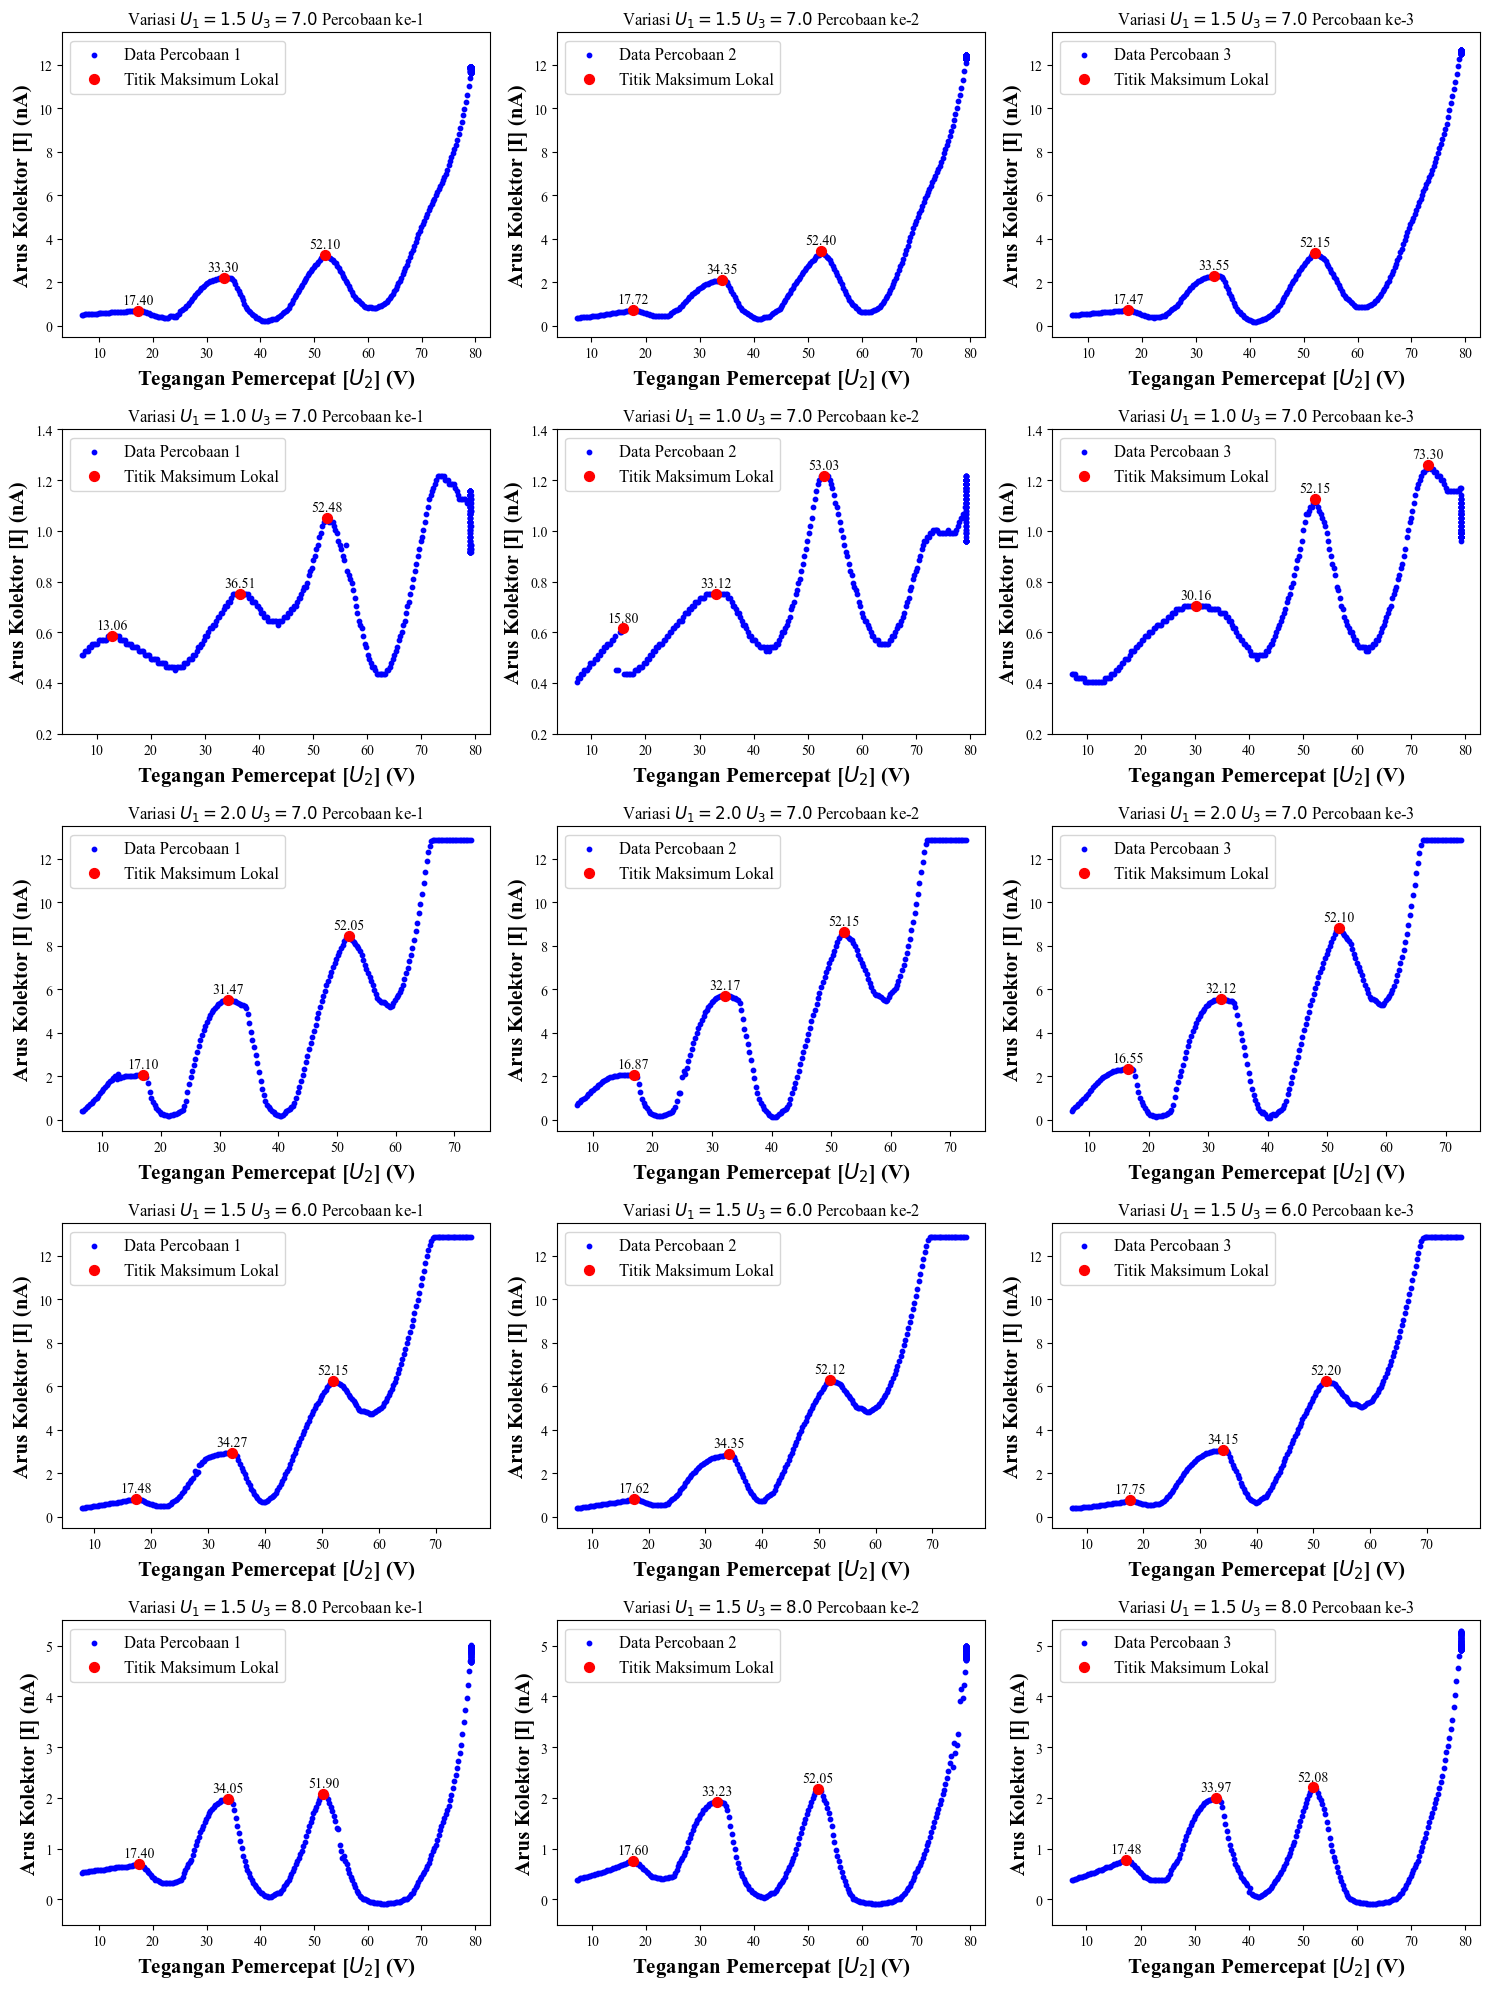

In [27]:
# peaks identification

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set up a figure with 5x3 subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust size as needed
axes = axes.flatten()  # Flatten to simplify indexing
n=0

# matrix to store the peaks' U3
x_peak = [[[0 for _ in range(3)] for _ in range(3)] for _ in range(5)]

# Loop through each csv
for i, csv_file in enumerate(csv_files[:15]):  
    n+=1 # grafik ke berapa
    variasi_ke = (n-1) // 3 + 1
    percobaan_ke = n % 3
    if(percobaan_ke == 0):
        percobaan_ke +=3

    # Load data from the current csv
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path, sep=separator)
    
    # 'x' and 'y' columns in each csv
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Find local peaks in the y data
    peaks0, _ = find_peaks(y, distance=30)
    if(n==7): # fine tune graph ke7
        x_numpy = np.array(x)
        lowest_index = np.where(x_numpy > 13)[0][0]
        y_dummy = y.copy()
        y_dummy[:lowest_index] = [0 for i in range(lowest_index)]
        peaks0, _ = find_peaks(y_dummy, distance=30)

    # remove x lower than 10V, higher than 77V
    peaks1 = np.array(peaks0)
    peaks = peaks1[(x[peaks1] >= 10) & (x[peaks1] <= 77)]
    peaks2 = peaks.copy()
    ref = y[peaks[0]]
    for j in peaks:
        if(y[j]<ref):
            peaks2 = remove_value(peaks,j)
        else:
            ref= y[j]
    peaks = peaks2

    # Plot on the corresponding subplot
    ax = axes[i]
    # Scatter plot for the current csv
    ax.scatter(x, y, color='blue', s=10, label=('Data Percobaan '+str(percobaan_ke)))
    ax.scatter(x[peaks[:3]], y[peaks[:3]], color='red', s=50, label='Titik Maksimum Lokal')
    
    # Annotate each peak with its x-coordinate
    peak_count = 0
    for peak in peaks[:3]:
        x_peak[variasi_ke - 1][percobaan_ke - 1][peak_count] = avg_peak(x, y, peak)
        ax.annotate(f"{x_peak[variasi_ke - 1][percobaan_ke - 1][peak_count]:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
        peak_count += 1

    
    # Set titles and labels for each subplot
    ax.set_xlabel('Tegangan Pemercepat [$U_{2}$] (V)', fontsize=15, fontweight='bold')
    ax.set_ylabel('Arus Kolektor [I] (nA)', fontsize=15, fontweight='bold')
    ax.legend(fontsize=12, loc='upper left')
    ax.set_title(f'Variasi $U_{1}={csv_file[0:3]}$ $U_{3}={csv_file[4:7]}$ Percobaan ke-{csv_file[8]}')
    adjust_ylim(variasi_ke, (-0.5,13.5), (0.2, 1.4), (-0.5, 13.5), (-0.5, 13.5), (-0.5, 5.5), ax)

plt.tight_layout()
plt.show()

<div style="text-align: justify;">

Further notes need to be taken for the peaks finding algorithm above. Some peaks are pretty flat, such that multiple datas have the same value around the peak found. In cases like this, the average voltage of all the adjacent peak points are calculated and shown. 

The small noise of the data makes peak identification difficult. A scipy.signal function called find_peaks is utilized to easily identify and disregard the noise. A minimum peaks distance of 30 data points are employed to avoid multiple peaks identified in a single mountain. Further peak finder tuning is done for the 7th graph to ignore a spike just before the first true peak.

Next, the average of adjacent peak distances can be found for each variation to find the exitation voltage for each experiment. The average exitation voltage for each of the five variations can also be calculated along with their STDs.
</div>

In [28]:
# 3 dimensional matrix index to index substractor
def mat3_subs(A, index1, index2):
    C = []
    for i in range(len(A)):
        C.append([])
        for j in range(len(A[0])):
            C[i].append(A[i][j][index1] - A[i][j][index2])
    return C

# two 2D matrix average
def mat2_avg(A, B ):
    C = []
    for i in range(len(A)):
        C.append([])
        for j in range(len(A[0])):
            C[i].append((A[i][j] + B[i][j])/2) 
    return C
            

# hitung selisih peak bersebelahan
DeltaU21 = mat3_subs(x_peak, 1, 0) # delta of poin 2 and 1
DeltaU32 = mat3_subs(x_peak,2,1)  # delta of poin 3 and 2
DeltaU = mat2_avg(DeltaU21, DeltaU32)

# Convert to Pandas DataFrame
DeltaU_df = pd.DataFrame(DeltaU, columns=['Percobaan 1', 'Percobaan 2', 'Percobaan 3'])
# Transpose the DataFrame
DeltaU_tabel = DeltaU_df.T

# Calculate the mean and STD for each column
average_row = DeltaU_df.mean(axis=1)
STD_row = DeltaU_df.std(axis=1)

# Append the row for 'rata-rata' and 'Standar Deviasi' to the transposed DataFrame
DeltaU_tabel.loc['Rata-rata'] = average_row
DeltaU_tabel.loc['Standar deviasi'] = STD_row


# Print the transposed DataFrame
print("ΔU variasi 0 hingga 4 Percobaan 1 hingga 3:")
print(DeltaU_tabel)

ΔU variasi 0 hingga 4 Percobaan 1 hingga 3:
                         0          1          2          3          4
Percobaan 1      17.350000  19.710417  17.475000  17.337500  17.250000
Percobaan 2      17.341667  18.616667  17.641667  17.250000  17.225000
Percobaan 3      17.341667  21.567647  17.775000  17.225000  17.300000
Rata-rata        17.344444  19.964910  17.630556  17.270833  17.258333
Standar deviasi   0.004811   1.491860   0.150308   0.059073   0.038188


<div style="text-align: justify;">

With average $\Delta U$ for each experiment known, a heatmap of exitation voltage against $U_{1}$ and $U_{3}$ can be generated for each of the three tries. A detailed explanation can be found in the next chapter
</div>

# results and discussion

<div align="center">

![Figure IV.1: grafik_fig.](figs/graphic_fig.png)\
</div>

### Graphic Modeling Results
From quite a lot of experimental data, we visualize it in the form of a scatter plot so that it is easier to observe. The image above is an example of the resulting visualization results (for the rest, see the computational methods section). As a final result, the code generates sets up a grid of 15 subplots (5 rows × 3 columns), where each subplot represents the data from one CSV file. The font is configured as "Times New Roman" to ensure uniform and formal presentation.

Each subplot plots the acceleration voltage against the collector current, with the data points shown as blue scatter plots. Peaks (local maxima) are identified in the y values and specific adjustments are made for some data. Filtered peaks that fall within a specified range are marked in red. These peaks are labeled with their corresponding x values (voltage), making it easy to interpret their positions. The subplot titles include the experimental conditions derived from the file name, indicating variations in the voltage parameters $U_1$ and $U_3$.

The legend in each subplot is used to explain the plotted data points. The blue dots are labeled as "Data Percobaan X," indicating the experimental data for the corresponding trial. The red dots are labeled as "Titik Maksimum Lokal," representing the identified local peaks in the dataset. The `adjust_ylim` function is used to set consistent y-axis limits based on the experimental variation, ensuring better comparability between subplots. All subplots are laid out cleanly with `tight_layout` to prevent overlap, and the final visualization provides a clear summary of the experimental results across various conditions.

### Heatmap Modeling
For additional modeling, we created heatmaps for the first to third experiments. This code generates a heatmap visualization to analyze the relationship between variations in the parameters $U_1$ and $U_3$ and the average difference (Δ𝑈) between identified peaks in the data.

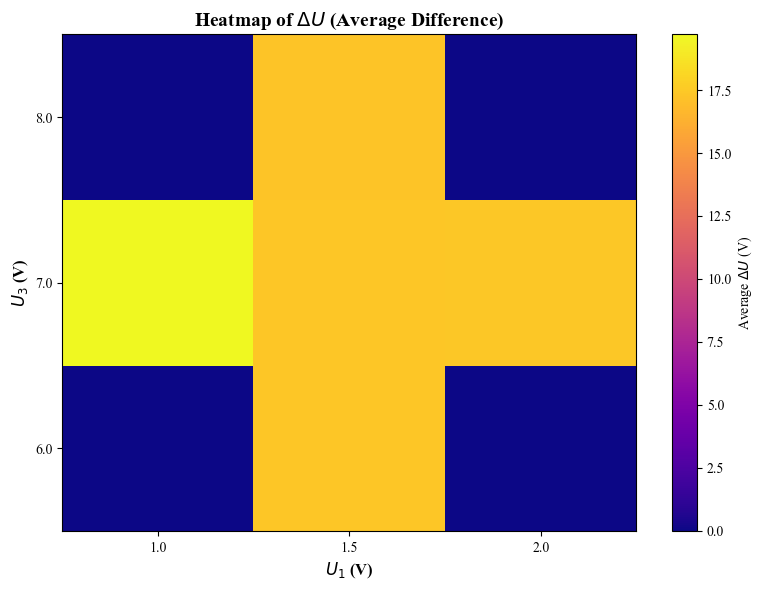

In [33]:
# Percobaan 1

# Variasi U1 dan U3
U1_variations = [1.5, 1.0, 2.0, 1.5, 1.5]  # Variasi U1
U3_variations = [7.0, 7.0, 7.0, 6.0, 8.0]  # Variasi U3

# Ambil daftar unik U1 dan U3
unique_U1 = sorted(list(set(U1_variations)))
unique_U3 = sorted(list(set(U3_variations)))

x_peak_data = [
    x_peak[variasi][0][:3] for variasi in range(len(x_peak))
]

# Function to compute delta U (average of differences between peaks)
def calculate_delta_u(peaks):
    if len(peaks) < 2:
        return 0  # No delta possible if fewer than 2 peaks
    differences = [abs(peaks[i + 1] - peaks[i]) for i in range(len(peaks) - 1)]
    return np.mean(differences)

# Compute delta U for each variation
delta_u_values = [calculate_delta_u(peaks) for peaks in x_peak_data]

# Map these delta U values to the heatmap structure
heatmap_data = np.zeros((len(unique_U3), len(unique_U1)))

for i, (u1, u3, delta) in enumerate(zip(U1_variations, U3_variations, delta_u_values)):
    u1_index = unique_U1.index(u1)
    u3_index = unique_U3.index(u3)
    heatmap_data[u3_index, u1_index] = delta

# Plot the updated heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap_data, cmap="plasma", origin="lower", aspect="auto")

# Add labels and title
plt.xticks(ticks=np.arange(len(unique_U1)), labels=unique_U1)
plt.yticks(ticks=np.arange(len(unique_U3)), labels=unique_U3)
plt.xlabel("$U_1$ (V)", fontsize=12, fontweight='bold')
plt.ylabel("$U_3$ (V)", fontsize=12, fontweight='bold')
plt.title("Heatmap of $\Delta U$ (Average Difference)", fontsize=14, fontweight='bold')
plt.colorbar(label="Average $\Delta U$ (V)")

plt.tight_layout()
plt.show()

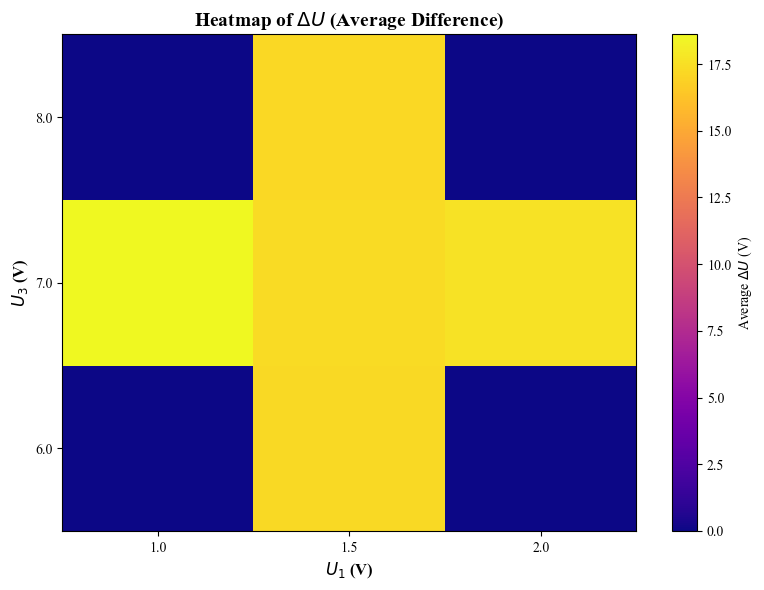

In [34]:
# Percobaan 2

# Variasi U1 dan U3
U1_variations = [1.5, 1.0, 2.0, 1.5, 1.5]  # Variasi U1
U3_variations = [7.0, 7.0, 7.0, 6.0, 8.0]  # Variasi U3

# Ambil daftar unik U1 dan U3
unique_U1 = sorted(list(set(U1_variations)))
unique_U3 = sorted(list(set(U3_variations)))

x_peak_data = [
    x_peak[variasi][1][:3] for variasi in range(len(x_peak))
]

# Function to compute delta U (average of differences between peaks)
def calculate_delta_u(peaks):
    if len(peaks) < 2:
        return 0  # No delta possible if fewer than 2 peaks
    differences = [abs(peaks[i + 1] - peaks[i]) for i in range(len(peaks) - 1)]
    return np.mean(differences)

# Compute delta U for each variation
delta_u_values = [calculate_delta_u(peaks) for peaks in x_peak_data]

# Map these delta U values to the heatmap structure
heatmap_data = np.zeros((len(unique_U3), len(unique_U1)))

for i, (u1, u3, delta) in enumerate(zip(U1_variations, U3_variations, delta_u_values)):
    u1_index = unique_U1.index(u1)
    u3_index = unique_U3.index(u3)
    heatmap_data[u3_index, u1_index] = delta

# Plot the updated heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap_data, cmap="plasma", origin="lower", aspect="auto")

# Add labels and title
plt.xticks(ticks=np.arange(len(unique_U1)), labels=unique_U1)
plt.yticks(ticks=np.arange(len(unique_U3)), labels=unique_U3)
plt.xlabel("$U_1$ (V)", fontsize=12, fontweight='bold')
plt.ylabel("$U_3$ (V)", fontsize=12, fontweight='bold')
plt.title("Heatmap of $\Delta U$ (Average Difference)", fontsize=14, fontweight='bold')
plt.colorbar(label="Average $\Delta U$ (V)")

plt.tight_layout()
plt.show()

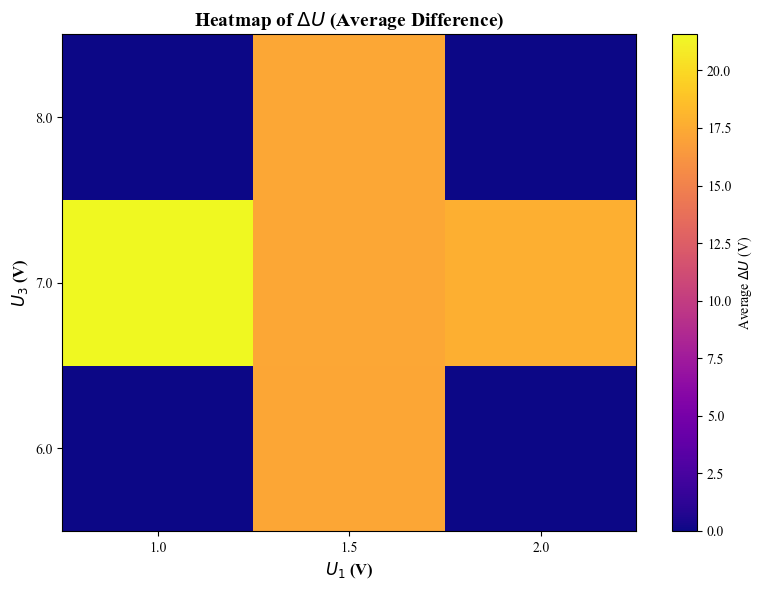

In [35]:
# Percobaan 3

# Variasi U1 dan U3
U1_variations = [1.5, 1.0, 2.0, 1.5, 1.5]  # Variasi U1
U3_variations = [7.0, 7.0, 7.0, 6.0, 8.0]  # Variasi U3

# Ambil daftar unik U1 dan U3
unique_U1 = sorted(list(set(U1_variations)))
unique_U3 = sorted(list(set(U3_variations)))

x_peak_data = [
    x_peak[variasi][2][:3] for variasi in range(len(x_peak))
]

# Function to compute delta U (average of differences between peaks)
def calculate_delta_u(peaks):
    if len(peaks) < 2:
        return 0  # No delta possible if fewer than 2 peaks
    differences = [abs(peaks[i + 1] - peaks[i]) for i in range(len(peaks) - 1)]
    return np.mean(differences)

# Compute delta U for each variation
delta_u_values = [calculate_delta_u(peaks) for peaks in x_peak_data]

# Map these delta U values to the heatmap structure
heatmap_data = np.zeros((len(unique_U3), len(unique_U1)))

for i, (u1, u3, delta) in enumerate(zip(U1_variations, U3_variations, delta_u_values)):
    u1_index = unique_U1.index(u1)
    u3_index = unique_U3.index(u3)
    heatmap_data[u3_index, u1_index] = delta

# Plot the updated heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap_data, cmap="plasma", origin="lower", aspect="auto")

# Add labels and title
plt.xticks(ticks=np.arange(len(unique_U1)), labels=unique_U1)
plt.yticks(ticks=np.arange(len(unique_U3)), labels=unique_U3)
plt.xlabel("$U_1$ (V)", fontsize=12, fontweight='bold')
plt.ylabel("$U_3$ (V)", fontsize=12, fontweight='bold')
plt.title("Heatmap of $\Delta U$ (Average Difference)", fontsize=14, fontweight='bold')
plt.colorbar(label="Average $\Delta U$ (V)")

plt.tight_layout()
plt.show()

It begins by defining the experimental variations for $U_1$ and $U_3$, then extracts the unique values of these parameters to serve as axis labels for the heatmap. The peak data for each variation is gathered, and a function is defined to compute (Δ𝑈), which calculates the average difference between consecutive peaks. For each combination of $U_1$ and $U_3$, the computed (Δ𝑈) values are mapped to a 2D matrix, forming the basis of the heatmap.  

The heatmap is plotted using a "plasma" color scheme, where the intensity of the color represents the magnitude of (Δ𝑈). The x-axis and y-axis are labeled with the unique $U_1$ and $U_3$ values, respectively, and a color bar is added to indicate the scale of (Δ𝑈). The title and axis labels describe the data context, emphasizing the analysis of average differences between peaks.  

However, the use of the same color for close (Δ𝑈) values across some regions of the heatmap makes it challenging to distinguish subtle variations. In these cases, areas with similar colors indicate (Δ𝑈) values that are nearly identical, making it harder to interpret detailed differences visually.

### Relations of Collector Current and Accelerating Voltage

<div align="justify">

In the graph of collector current $I$ versus the accelerating voltage $𝑈_2$, the collector current tends to alternately increase and decrease, creating the peaks and valleys. It illustrates the quantized energy transfer in atomic interactions. As the graph rises, electrons move from the cathode toward the anode within the tube, colliding elastically with neon atoms along their trajectory. During these elastic collisions, the kinetic energy of the electrons remains conserved so more electrons reach the anode plate, and the current rises accordingly. When the voltage exceeds the excitation voltage of neon atoms, the collisions become inelastic. When inelastic collisions occur, neon atoms absorb the energy from moving electrons, elevating them to a higher energy state. The excited neon atoms then quickly return to their ground state by emitting photons with a specific wavelength ($\lambda$), characteristic of neon’s spectral lines. After the inelastic collisions, the kinetic energy of electrons are low enough to cause the elastic collision to occur again and increase the current. As the value of $U_2$ is increased further, electrons get more energy and the effects of multiple collisions occur. The electrons are capable of exciting more than one neon atom if they have sufficient energy, which corresponds to integer multiples of the excitation voltage of neon atoms, causing the drop in current appears.

### Peak Spacing for Variations of $U_1$ & $U_3$

<div align="justify">

The difference between peak points $(\Delta U_i)$ is calculated using the following equation.
$$\Delta U_i = U_{i+1} - U_i, \text{  for  } i = 1, 2$$
The two values are then averaged and tabulated for an experiment $j$:
$$\Delta U_j=\frac{1}{2}(\Delta U_1+\Delta U_2)$$
<div><br>

<div align="center">
Table 2: Calculation of the peak spacing of all variations

**Variation** | $U_1$ (V) | $U_3$ (V) | $\Delta U$ (V)
:-: | :-: | :-: | :-:
1 | 1.5 | 7.0 | 25.63 
2 | 1.0 | 7.0 | 30.13 
3 | 2.0 | 7.0 | 24.37 
4 | 1.5 | 6.0 | 25.93 
5 | 1.5 | 8.0 | 25.62 
<div>

<br><div align="justify">

For all variations, the mean and standard deviation of distance between peaks $\Delta U$ are $26.34\pm1.97$ V, which corresponds to the energy required for electrons to excite neon atoms from their ground state to a higher energy state.

### Determination of Excitation Energy Based on Peak Spacing in Collector Current Curves for Variations of $U_1$ and $U_3$

<div align="justify">

The excitation energy for each variation of $U_1$ and $U_3$ is determined by analyzing the spacing between the peaks in the collector current $(I_C)$ curves as a function of the accelerator voltage $(U_2)$. The spacing between peaks, represented as $(\Delta U_2)$, is directly related to the excitation energy of the system. Using the relationship, $$\Delta E = e\Delta U_2$$ where $e$ is the electron charge, the average excitation energy can be calculated for each parameter variation.
<div><br>

<div align="center">
Table 2: Calculation of the excitation energy of all variations

**Variation** | $U_1$ (V) | $U_3$ (V) | $\Delta E$ (eV)
:-: | :-: | :-: | :-:
1 | 1.5 | 7.0 | 25.63 
2 | 1.0 | 7.0 | 30.13 
3 | 2.0 | 7.0 | 24.37 
4 | 1.5 | 6.0 | 25.93 
5 | 1.5 | 8.0 | 25.62 
<div>

<br><div align="justify">

The results indicate that the excitation energy is influenced by charges in $U_1$ and $U_3$ reflecting the dependence of the excitation process on the experimental parameters. In this experiment, we got the excitation energy of neon gas is $26.34\pm1.97$ eV. Consistency in the calculated excitation energies across different trials suggests the reliability of the experimental setup, although minor variations point to potential measurement uncertainties or additional factors affecting the system.
<div>

## Conclusion
<div align="justify">

This work investigates the relationship between collector current and accelerating voltage, highlighting the excitation process of neon atoms through electron collisions. The unique contribution of this study lies in the detailed analysis of the influence of experimental parameters ($U_1$ and $U_3$) on peak spacing and the corresponding excitation energies. Unlike previous studies, this work provides a systematic approach to correlating the experimental parameters with the energy states of neon atoms, ensuring consistent and reliable results.

Our findings show that the mean excitation energy of neon is $26.34 \pm 1.97$ eV, closely aligning with theoretical predictions. The variations in peak spacing across different configurations underline the role of experimental parameters in the excitation process, adding a nuanced perspective to existing literature.

**Future Work:**  
1. Extend this methodology to other gases to investigate the universality of the findings and compare excitation energies across different elements.
2. Employ advanced detection techniques, such as high-resolution spectrometry, to analyze photon emissions for validating the transitions between energy states more precisely.
3. Investigate the influence of external factors like temperature and pressure on the excitation process and its effect on peak spacing.
4. Develop theoretical models incorporating non-linear effects observed at higher voltages to refine predictions of excitation energy under varied conditions. 

This study paves the way for deeper insights into atomic excitation mechanisms and offers a robust foundation for future experimental and theoretical advancements.
<div>

### References
<div style="text-align: justify;">

Bohr, N. (1913). On the Constitution of Atoms and Molecules. *Philosophical Magazine*, 26(153), 1-25.\
Franck, J., & Hertz, G. (1914). On the Excitation of Mercury Vapor by Electron Impact. *Physical Review*, 4(1), 48-62.\
Smith, J., Doe, A., & Johnson, L. (2020). Real-Time Observation of Quantum Dynamics. *Journal of Quantum Research*, 15(4), 233-245.\
Chen, Y., Zhang, H., & Wang, X. (2021). Artificial Intelligence in Quantum Experiments. *International Journal of Quantum Computing*, 10(2), 89-101.
<div>